In [95]:
import numpy as np
import pandas as pd

In [96]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [97]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country,Cumulative_cases
1,1/3/2020,Afghanistan,0
2,1/4/2020,Afghanistan,0
3,1/5/2020,Afghanistan,0
4,1/6/2020,Afghanistan,0
5,1/7/2020,Afghanistan,0
...,...,...,...
148595,9/16/2021,Zimbabwe,127083
148596,9/17/2021,Zimbabwe,127368
148597,9/18/2021,Zimbabwe,127632
148598,9/19/2021,Zimbabwe,127739


In [98]:
countries = df['Country'].unique()
countries
countries_sel= ["Italy","Germany","Turkey"]
countries_sel

['Italy', 'Germany', 'Turkey']

In [99]:
data = df[df['Country'].isin(countries_sel)]
data
ita = df[df['Country'] == 'Italy']
ita=ita.reset_index()
ita.index +=1
ita


,index,Date_reported,Country,Cumulative_cases
1,64582,1/3/2020,Italy,0
2,64583,1/4/2020,Italy,0
3,64584,1/5/2020,Italy,0
4,64585,1/6/2020,Italy,0
5,64586,1/7/2020,Italy,0
...,...,...,...,...
623,65204,9/16/2021,Italy,4618040
624,65205,9/17/2021,Italy,4623155
625,65206,9/18/2021,Italy,4627699
626,65207,9/19/2021,Italy,4632275


In [100]:
ger = df[df['Country'] == 'Germany']
ger=ger.reset_index()
ger.index +=1
ger

,index,Date_reported,Country,Cumulative_cases
1,48907,1/3/2020,Germany,0
2,48908,1/4/2020,Germany,0
3,48909,1/5/2020,Germany,0
4,48910,1/6/2020,Germany,0
5,48911,1/7/2020,Germany,0
...,...,...,...,...
623,49529,9/16/2021,Germany,4114856
624,49530,9/17/2021,Germany,4125878
625,49531,9/18/2021,Germany,4134779
626,49532,9/19/2021,Germany,4142116


In [101]:
tur = df[df['Country'] == 'Turkey']
tur=tur.reset_index()
tur.index +=1
tur

,index,Date_reported,Country,Cumulative_cases
1,136687,1/3/2020,Turkey,0
2,136688,1/4/2020,Turkey,0
3,136689,1/5/2020,Turkey,0
4,136690,1/6/2020,Turkey,0
5,136691,1/7/2020,Turkey,0
...,...,...,...,...
623,137309,9/16/2021,Turkey,6738890
624,137310,9/17/2021,Turkey,6767008
625,137311,9/18/2021,Turkey,6794700
626,137312,9/19/2021,Turkey,6820861


In [102]:
#Start of Covid Check

In [103]:
ita_case =ita['Cumulative_cases'].head(100)
print(ita_case)
print(ita_case.index.values)
for i in range(len(ita_case)):
    i=i+1
    if ita_case[i] >= 50:
        print(i)
        break
        

1           0
2           0
3           0
4           0
5           0
        ...  
96     132547
97     135586
98     139422
99     143626
100    147577
Name: Cumulative_cases, Length: 100, dtype: int64
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
52


In [104]:
print(ita.loc[[52]])

    index Date_reported Country  Cumulative_cases
52  64633     2/23/2020   Italy                79


In [105]:
ger_case =ger['Cumulative_cases'].head(100)
#print(ger_case)
#print(ger_case.index.values)
for i in range(len(ger_case)):
    i=i+1
    if ger_case[i] >= 50:
        print(i)
        break

58


In [106]:
print(ger.loc[[58]])

    index Date_reported  Country  Cumulative_cases
58  48964     2/29/2020  Germany                57


In [107]:
tur_case =tur['Cumulative_cases'].head(100)
#print(tur_case)
#print(tur_case.index.values)
for i in range(len(tur_case)):
    i=i+1
    if tur_case[i] >= 50:
        print(i)
        break

76


In [108]:
print(tur.loc[[76]])

     index Date_reported Country  Cumulative_cases
76  136762     3/18/2020  Turkey                98


## Version 3: Approximation of Logarithmic Graph(split the time series of each country into several waves)¶

### ITALY

In [109]:
x_ita= ita.index.values
n= len(ita['Cumulative_cases'])
y_ita=np.empty(n)
frac=np.empty(n)
#x_ita_show=x_ita[0:500]


In [110]:
for i in range(n-1):
    i+=1
    try:
        frac[i-1]=(ita['Cumulative_cases'][i])/59550000
    except ZeroDivisionError:
        frac[i-1] = 0 
    if(frac[i-1] != 0):
        y_ita[i-1]= np.log(frac[i-1])
    else:
        y_ita[i-1]=0

In [111]:
#y_ita_show=y_ita[0:500]

x_ita1=x_ita[50:85]
y_ita1=y_ita[50:85]
ita_curve1 = np.polyfit(x_ita1,y_ita1,1)
print(ita_curve1)

x_ita2=x_ita[85:286]
y_ita2=y_ita[85:286]
ita_curve2 = np.polyfit(x_ita2,y_ita2,1)
print(ita_curve2)

x_ita3=x_ita[286:338]
y_ita3=y_ita[286:338]
ita_curve3 = np.polyfit(x_ita3,y_ita3,1)
print(ita_curve3)

x_ita4=x_ita[338:625]
y_ita4=y_ita[338:625]
ita_curve4 = np.polyfit(x_ita4,y_ita4,1)
print(ita_curve4)

[  0.20886596 -23.50340957]
[ 3.73405017e-03 -6.24022719e+00]
[  0.03233615 -14.32636749]
[ 3.22059993e-03 -4.40691524e+00]


In [112]:
a1= ita_curve1[0]
b1=ita_curve1[1]
a2=ita_curve2[0]
b2=ita_curve2[1]
a3=ita_curve3[0]
b3=ita_curve3[1]
a4=ita_curve4[0]
b4=ita_curve4[1]

In [113]:
y1 = a1*x_ita1 +b1
y2 = a2*x_ita2 +b2
y3 = a3*x_ita3 +b3
y4 = a4*x_ita4 +b4

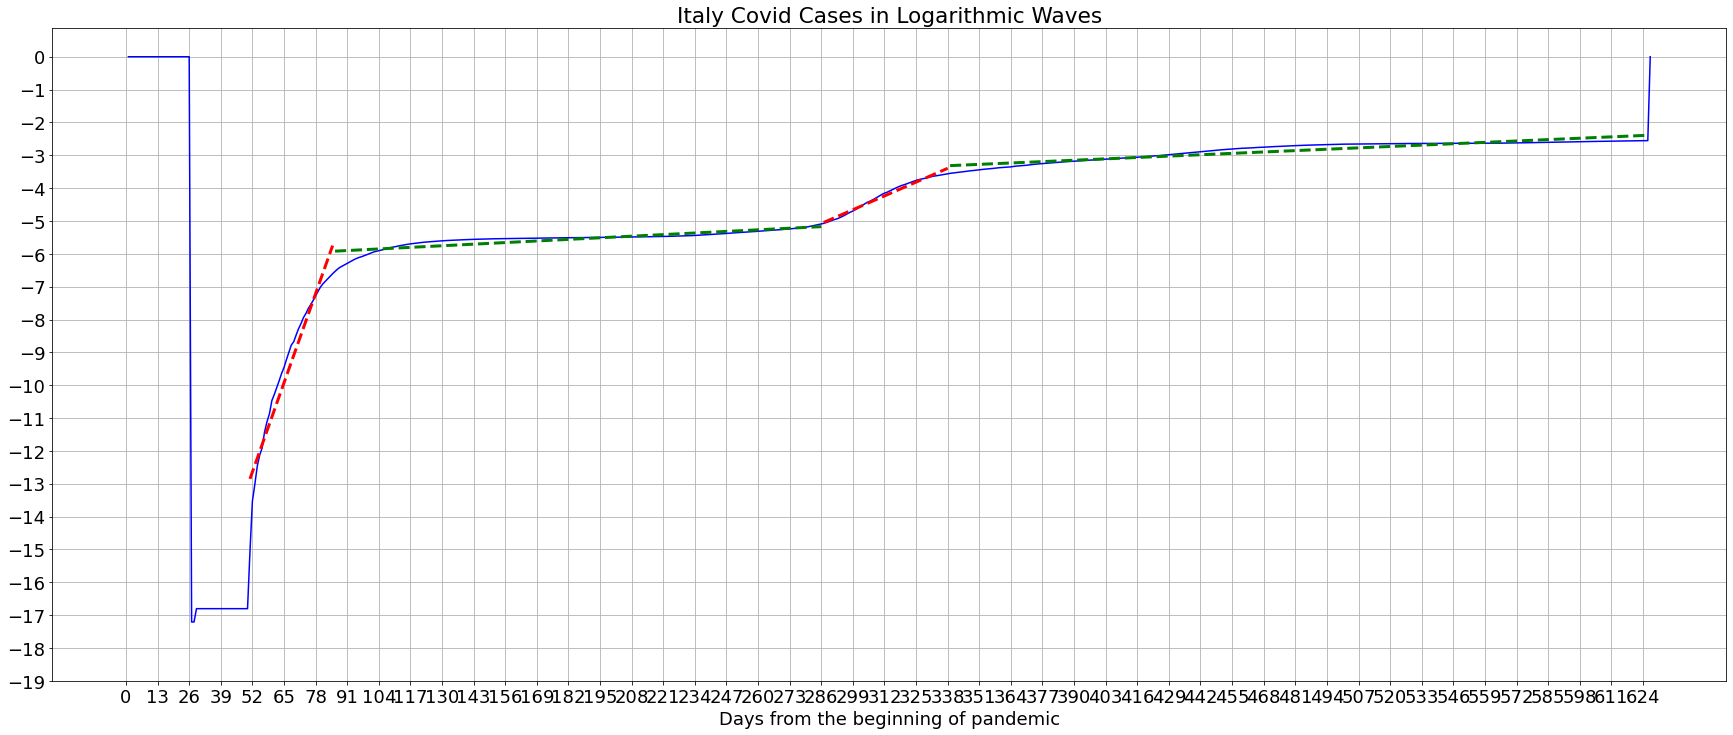

In [114]:
plt.plot(x_ita,y_ita,color="blue")
plt.plot(x_ita1,y1,color="red",linestyle="dashed",linewidth=3.0)
plt.plot(x_ita2,y2,color="green",linestyle="dashed",linewidth=3.0)
plt.plot(x_ita3,y3,color="red",linestyle="dashed",linewidth=3.0)
plt.plot(x_ita4,y4,color="green",linestyle="dashed",linewidth=3.0)
#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,625,13))
plt.yticks(np.arange(-19,1,1))
plt.title('Italy Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### GERMANY

In [22]:
x_ger = ger.index.values
n2= len(ger['Cumulative_cases'])
y_ger=np.empty(n2)
frac_g=np.empty(n2)

In [23]:
for i in range(n2-1):
    i+=1
    try:
        frac_g[i-1]=(ger['Cumulative_cases'][i])/83240000
    except ZeroDivisionError:
        frac_g[i-1] = 0 
    if(frac_g[i-1] != 0):
        y_ger[i-1]= np.log(frac_g[i-1])
    else:
        y_ger[i-1]=0

In [24]:
x_ger1=x_ger[52:95]
y_ger1=y_ger[52:95]
ger_curve1 = np.polyfit(x_ger1,y_ger1,1)
print(ger_curve1)

x_ger2=x_ger[95:286]
y_ger2=y_ger[95:286]
ger_curve2 = np.polyfit(x_ger2,y_ger2,1)
print(ger_curve2)

x_ger3=x_ger[286:390]
y_ger3=y_ger[286:390]
ger_curve3 = np.polyfit(x_ger3,y_ger3,1)
print(ger_curve3)

x_ger4=x_ger[390:620]
y_ger4=y_ger[390:620]
ger_curve4 = np.polyfit(x_ger4,y_ger4,1)
print(ger_curve4)

[  0.22068243 -26.56389637]
[ 4.15179659e-03 -6.81367255e+00]
[  0.01825551 -10.5574542 ]
[ 2.70691753e-03 -4.61336847e+00]


In [25]:
c1=ger_curve1[0]
d1=ger_curve1[1]

c2=ger_curve2[0]
d2=ger_curve2[1]

c3=ger_curve3[0]
d3=ger_curve3[1]

c4=ger_curve4[0]
d4=ger_curve4[1]

In [26]:
y1 = c1*x_ger1 +d1
y2 = c2*x_ger2 +d2
y3 = c3*x_ger3 +d3
y4 = c4*x_ger4 +d4

print(x_ger1)


[53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


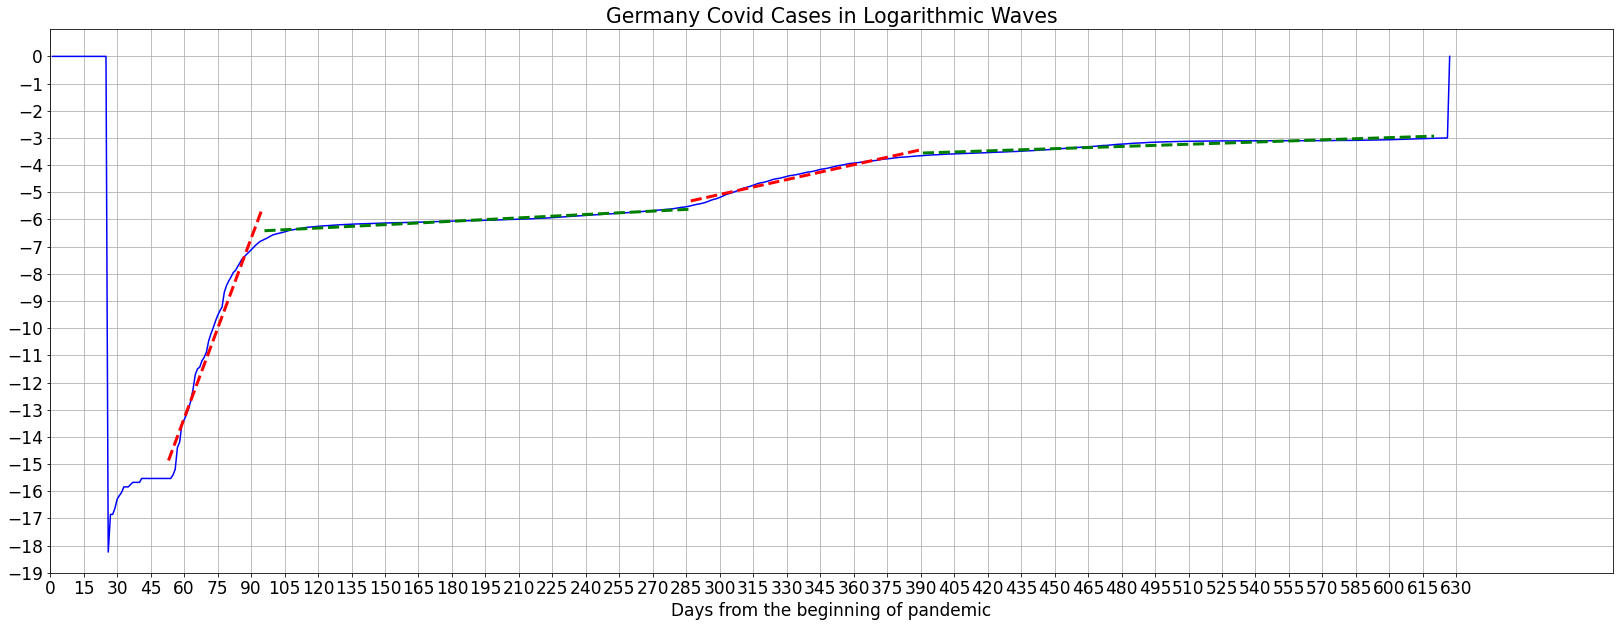

In [27]:


plt.plot(x_ger,y_ger, color="blue")
plt.plot(x_ger1,y1,color="red",linestyle="dashed",linewidth=3.0)
plt.plot(x_ger2,y2,color="green",linestyle="dashed",linewidth=3.0)
plt.plot(x_ger3,y3,color="red",linestyle="dashed",linewidth=3.0)
plt.plot(x_ger4,y4,color="green",linestyle="dashed",linewidth=3.0)
plt.ylim(-19,1)
plt.xlim(0,700)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xticks(np.arange(0,640,15))
plt.yticks(np.arange(-19,1,1))
plt.xlabel('Days from the beginning of pandemic')
#plt.ylabel('Number of Cases (In Millions)')
plt.title('Germany Covid Cases in Logarithmic Waves')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### TURKEY

In [28]:
x_tur = tur.index.values
n3= len(tur['Cumulative_cases'])
y_tur=np.empty(n3)
frac_t=np.empty(n3)

In [29]:
for i in range(n2-1):
    i+=1
    try:
        frac_t[i-1]=(tur['Cumulative_cases'][i])/84340000
    except ZeroDivisionError:
        frac_t[i-1] = 0 
    if(frac_t[i-1] != 0):
        y_tur[i-1]= np.log(frac_t[i-1])
    else:
        y_tur[i-1]=0


In [30]:
x_tur1=x_tur[70:104]
y_tur1=y_tur[70:104]
tur_curve1 = np.polyfit(x_tur1,y_tur1,1)
print(tur_curve1)

x_tur2=x_tur[104:207]
y_tur2=y_tur[104:207]
tur_curve2 = np.polyfit(x_tur2,y_tur2,1)
print(tur_curve2)

x_tur3=x_tur[207:351]
y_tur3=y_tur[207:351]
tur_curve3 = np.polyfit(x_tur3,y_tur3,1)
print(tur_curve3)

x_tur4=x_tur[351:468]
y_tur4=y_tur[351:468]
tur_curve4 = np.polyfit(x_tur4,y_tur4,1)
print(tur_curve4)

x_tur5=x_tur[468:626]
y_tur5=y_tur[468:626]
tur_curve5 = np.polyfit(x_tur5,y_tur5,1)
print(tur_curve5)

[  0.28615977 -35.37681042]
[ 0.00877203 -7.63450307]
[ 0.01291828 -8.32858189]
[ 4.61421151e-03 -5.35222652e+00]
[ 2.36897034e-03 -4.02831639e+00]


In [31]:
e1=tur_curve1[0]
f1=tur_curve1[1]

e2=tur_curve2[0]
f2=tur_curve2[1]

e3=tur_curve3[0]
f3=tur_curve3[1]

e4=tur_curve4[0]
f4=tur_curve4[1]

e5=tur_curve5[0]
f5=tur_curve5[1]

In [32]:
y1=e1*x_tur1+f1

y2=e2*x_tur2+f2

y3=e3*x_tur3+f3

y4=e4*x_tur4+f4

y5=e5*x_tur5+f5

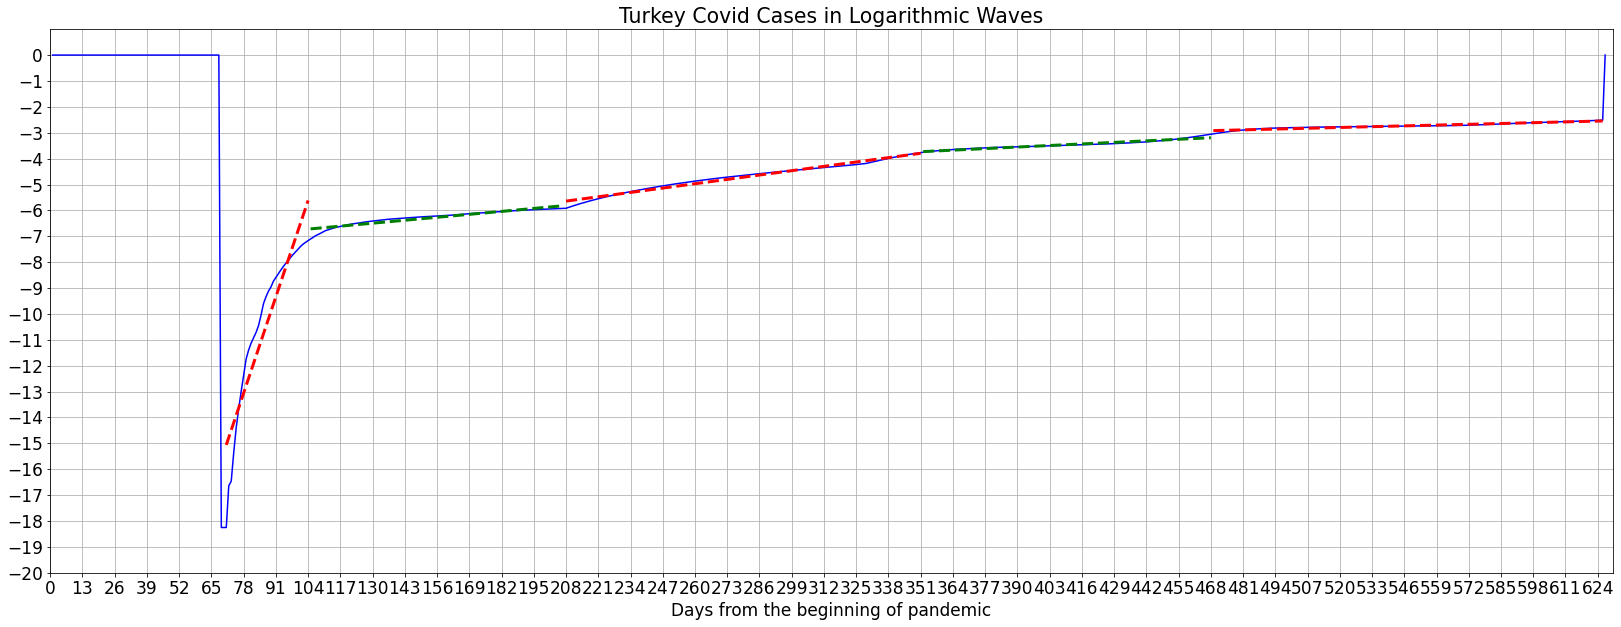

In [33]:
plt.plot(x_tur,y_tur, color="blue")
plt.plot(x_tur1,y1,color="red",linestyle="dashed",linewidth=3.0)
plt.plot(x_tur2,y2,color="green",linestyle="dashed",linewidth=3.0)
plt.plot(x_tur3,y3,color="red",linestyle="dashed",linewidth=3.0)
plt.plot(x_tur4,y4,color="green",linestyle="dashed",linewidth=3.0)
plt.plot(x_tur5,y5,color="red",linestyle="dashed",linewidth=3.0)
plt.ylim(-20,1)
plt.xlim(0,630)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xticks(np.arange(0,630,13))
plt.yticks(np.arange(-20,1,1))
plt.xlabel('Days from the beginning of pandemic')
#plt.ylabel('Number of Cases (In Millions)')
plt.title('Turkey Covid Cases in Logarithmic Waves')
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

#  Task 8

### ITALY

First Wave:  LOG, WAVE1 = (51 to 285), WAVE2 =(286 to 625)

In [34]:
x_ita= ita.index.values
y= ita['Cumulative_cases']
wave1_x = x_ita[50:285]
wave1_y = y[50:285]

val = y[285]
print(val)
wave2_x = x_ita[285:625]
wave2_y = y[285:625] - val

print(wave1_x)
print(wave1_y)

359569
[ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285]
51         17
52         79
53        

In [35]:
#variables for normalised data and their logarithm
wave1_norm = wave1_y/59550000
wave1_log = np.log(wave1_norm)
print(wave1_norm)
print(ita['Cumulative_cases'][51])

wave2_norm = wave2_y/59550000
wave2_log = np.log(wave2_norm)

51     2.854744e-07
52     1.326616e-06
53     2.216625e-06
54     3.845508e-06
55     5.407221e-06
           ...     
281    5.682586e-03
282    5.772796e-03
283    5.868917e-03
284    5.960537e-03
285    6.038102e-03
Name: Cumulative_cases, Length: 235, dtype: float64
17


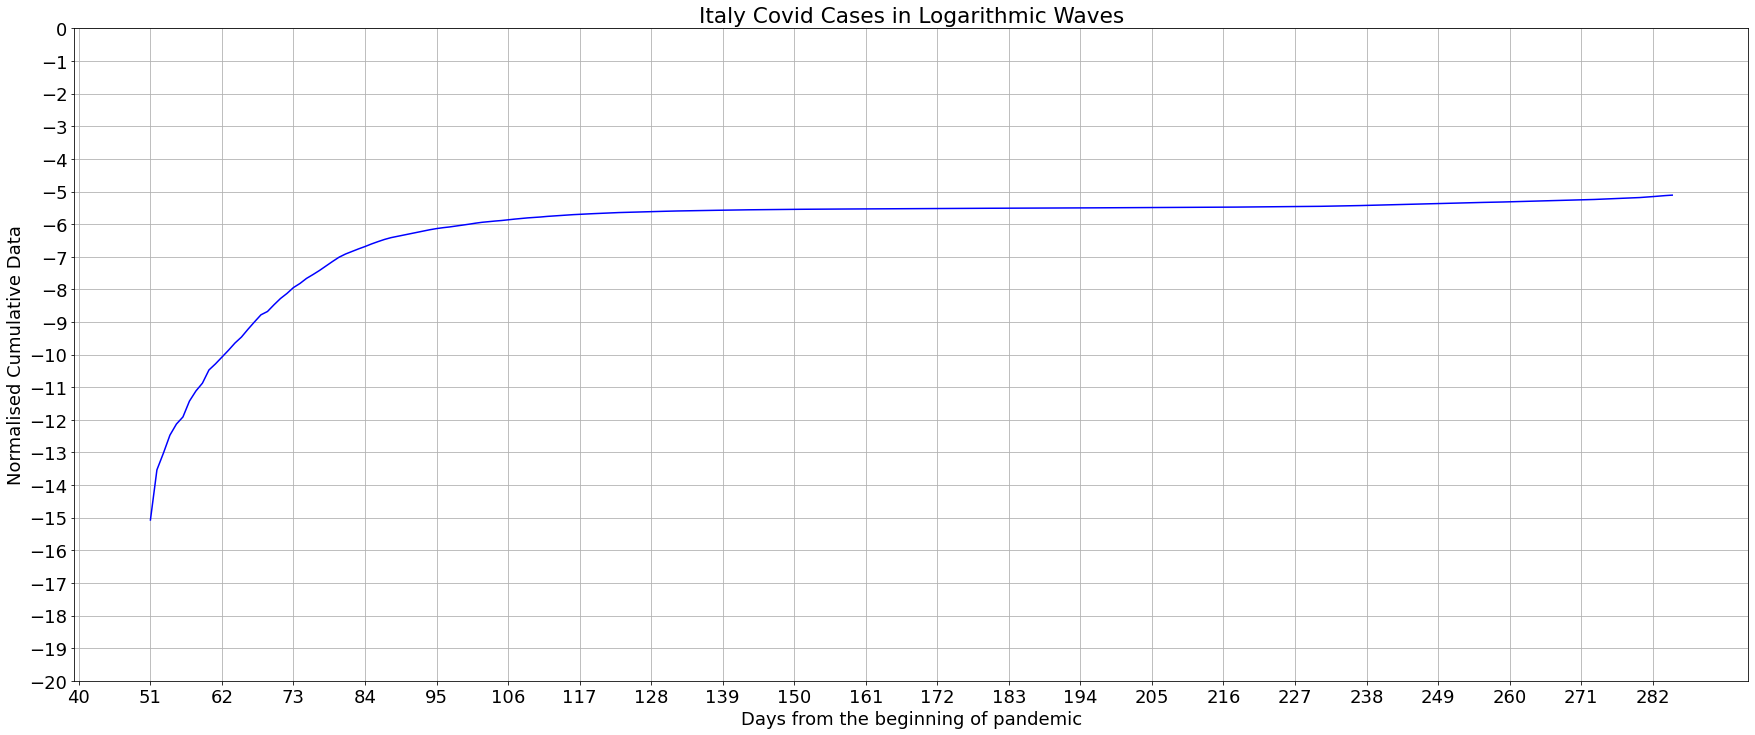

In [36]:
#plot data of the first wave
plt.plot(wave1_x,wave1_log, color="blue")

#plt.ylim(-1,20)
#plt.xlim(40,290)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xticks(np.arange(40,290,11))
plt.yticks(np.arange(-20,1,1))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Italy Covid Cases in Logarithmic Waves')
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

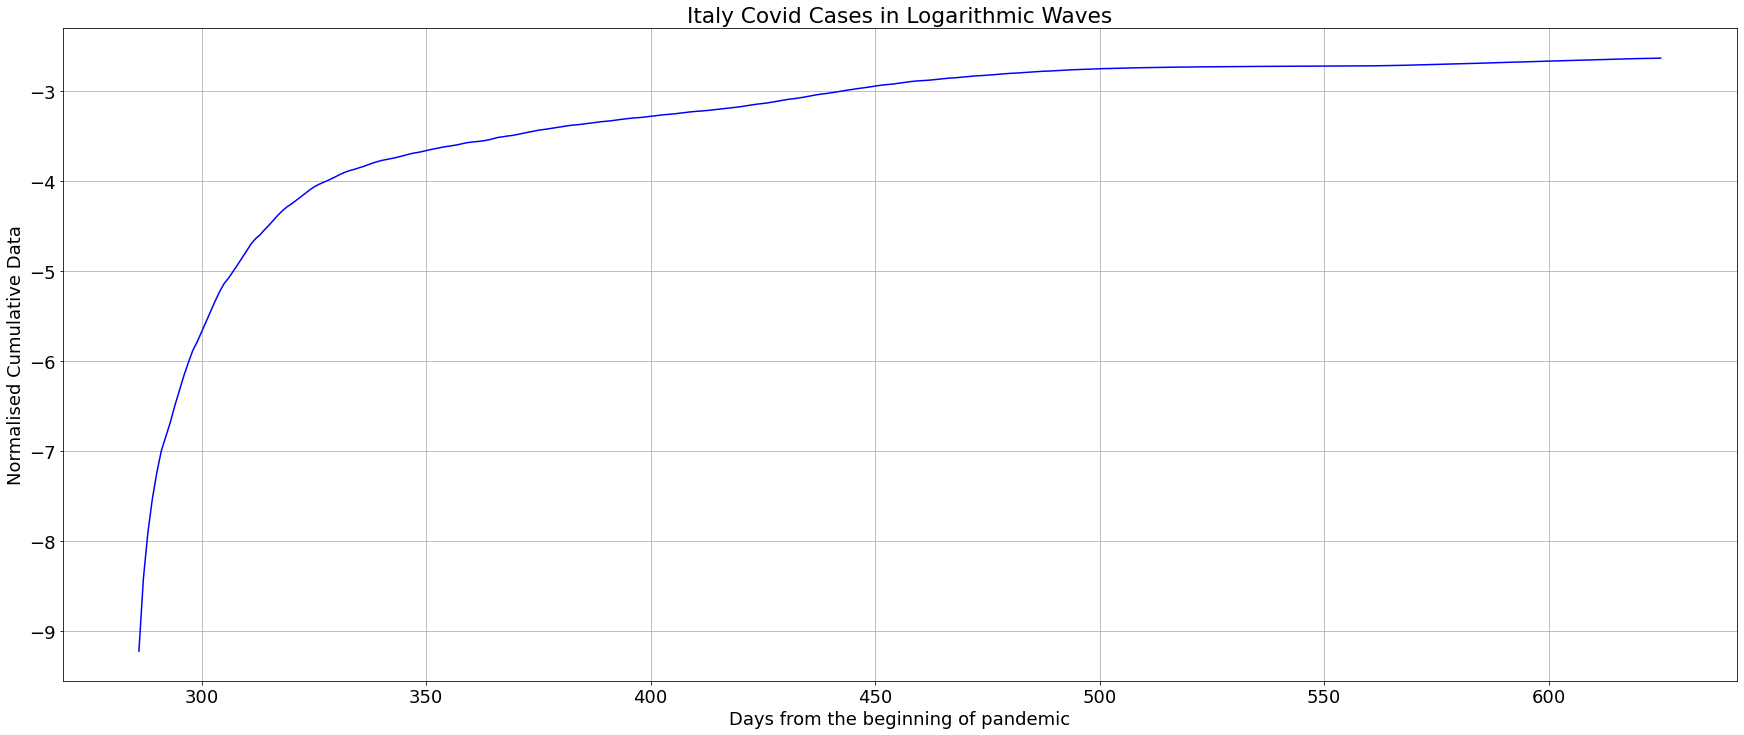

In [37]:
#plot data of the Second wave
plt.plot(wave2_x,wave2_log, color="blue")

#plt.ylim(-1,20)
#plt.xlim(40,290)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
#plt.xticks(np.arange(40,290,11))
#plt.yticks(np.arange(-20,1,1))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Italy Covid Cases in Logarithmic Waves')
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

Germany First Wave: LOG, WAVE1 = (52 to 286), WAVE2 =(287 to 620)

In [38]:
x_ger= ger.index.values
y= ger['Cumulative_cases']
wave1_x = x_ger[51:286]
wave1_y = y[51:286]

val = y[285]
print(val)
wave2_x = x_ger[286:620]
wave2_y = y[286:620] - val

print(wave1_x)
print(wave1_y)

329453
[ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286]
52         15
53         15
54        

In [39]:
#variables for normalised data and their logarithm
wave1_norm = wave1_y/83240000 
wave1_log = np.log(wave1_norm)
print(wave1_norm)
print(ger['Cumulative_cases'][52])

wave2_norm = wave2_y/83240000 
wave2_log = np.log(wave2_norm)


52     1.802018e-07
53     1.802018e-07
54     1.802018e-07
55     2.042287e-07
56     2.522826e-07
           ...     
282    3.836869e-03
283    3.878712e-03
284    3.908349e-03
285    3.957869e-03
286    4.019522e-03
Name: Cumulative_cases, Length: 235, dtype: float64
15


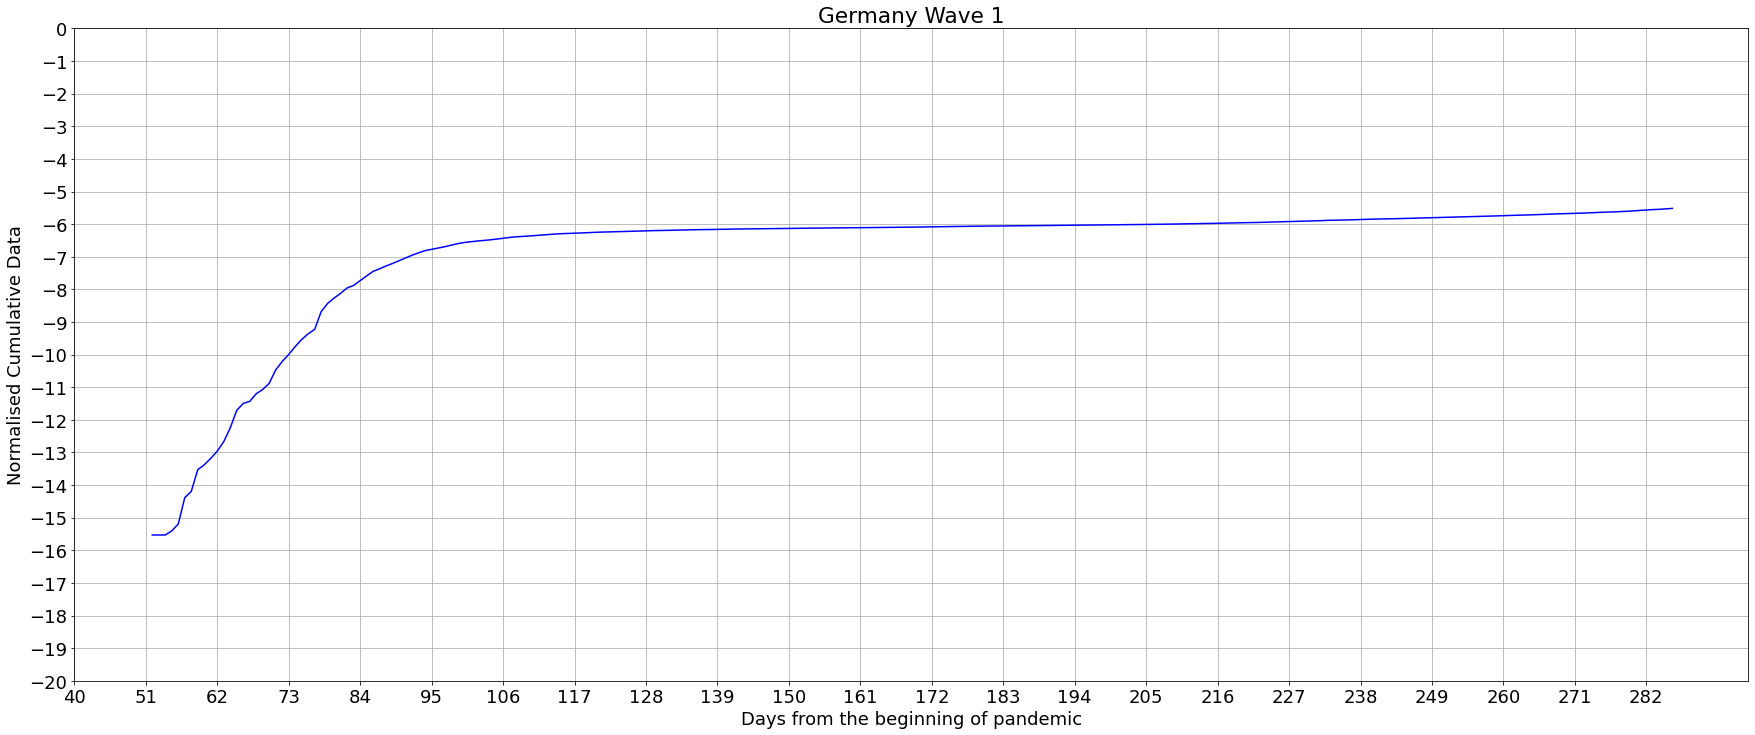

In [40]:
#plot data of the first wave
plt.plot(wave1_x,wave1_log, color="blue")

#plt.ylim(-1,20)
#plt.xlim(40,290)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xticks(np.arange(40,290,11))
plt.yticks(np.arange(-20,1,1))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Germany Wave 1')
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

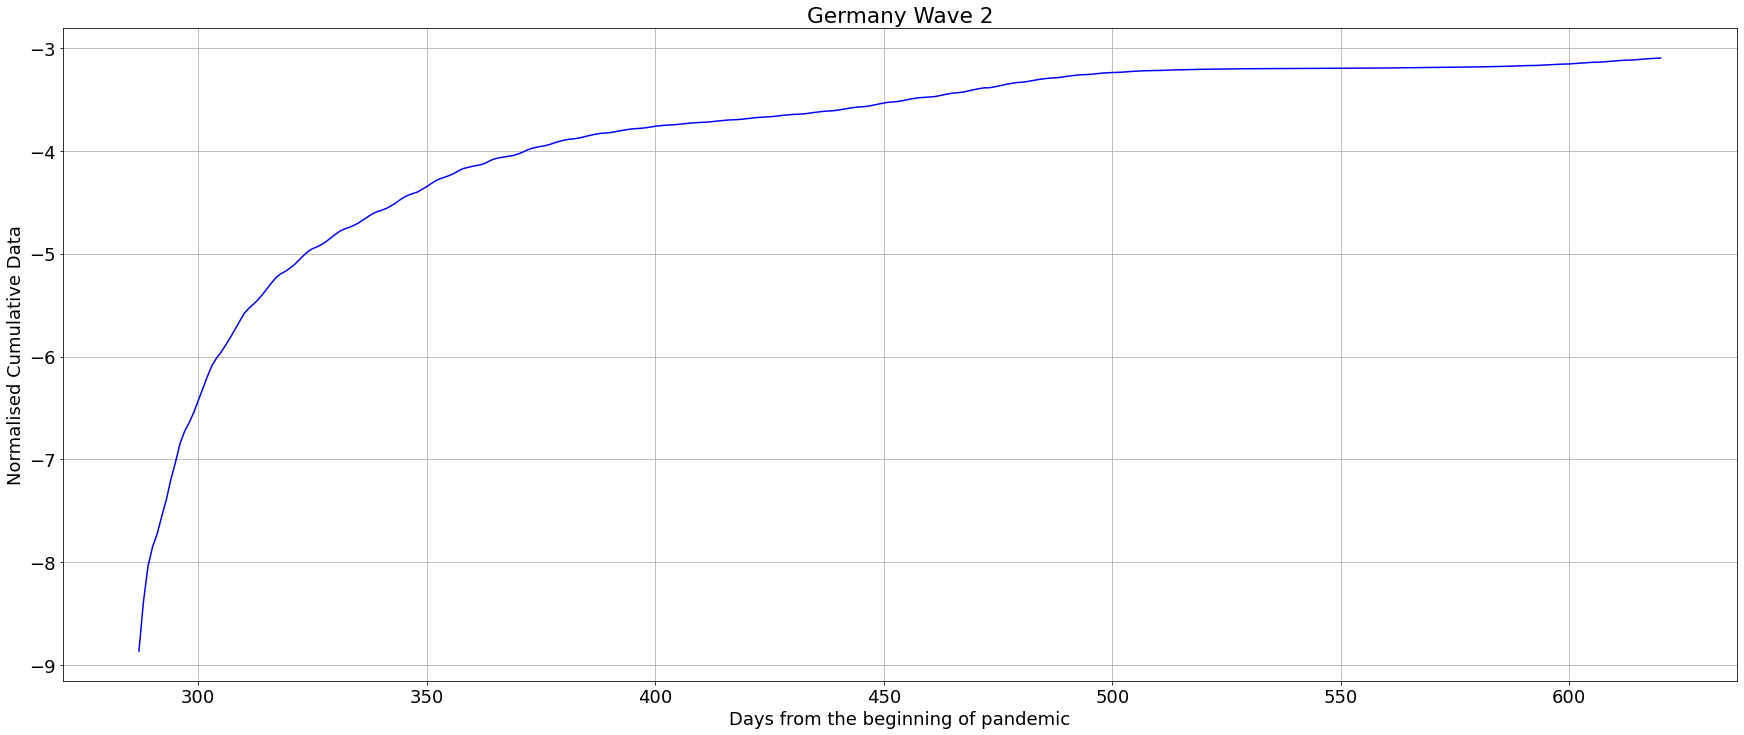

In [41]:
#plot data of the Second wave
plt.plot(wave2_x,wave2_log, color="blue")

#plt.ylim(-1,20)
#plt.xlim(40,290)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
#plt.xticks(np.arange(40,290,11))
#plt.yticks(np.arange(-20,1,1))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Germany Wave 2')
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

Turkey First Wave: LOG, WAVE1 = (70 to 207), WAVE2 =(207 to 626)

In [42]:
for i in range(n2-1):
    i+=1
    try:
        frac_t[i-1]=(tur['Cumulative_cases'][i])/84340000
    except ZeroDivisionError:
        frac_t[i-1] = 0 
    if(frac_t[i-1] != 0):
        y_tur[i-1]= np.log(frac_t[i-1])
    else:
        y_tur[i-1]=0

In [43]:
x_tur= tur.index.values
y= tur['Cumulative_cases']
wave1_x = x_tur[69:207]
wave1_y = y[69:207]

val = y[207]
print(val)
wave2_x = x_tur[207:626]
wave2_y = y[207:626] - val

print(wave1_x)
print(wave1_y)

226100
[ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207]
70          1
71          1
72          5
73          6
74         18
        ...  
203    222402
204    223315
205    224252
206    225173
207    226100
Name: Cumulative_cases, Length: 138, dtype: int64


In [44]:
#variables for normalised data and their logarithm
wave1_norm = wave1_y/83340000 
wave1_log = np.log(wave1_norm)
print(wave1_norm)
print(tur['Cumulative_cases'][70])

wave2_norm = wave2_y/83340000 
wave2_log = np.log(wave2_norm)


70     1.199904e-08
71     1.199904e-08
72     5.999520e-08
73     7.199424e-08
74     2.159827e-07
           ...     
203    2.668611e-03
204    2.679566e-03
205    2.690809e-03
206    2.701860e-03
207    2.712983e-03
Name: Cumulative_cases, Length: 138, dtype: float64
1


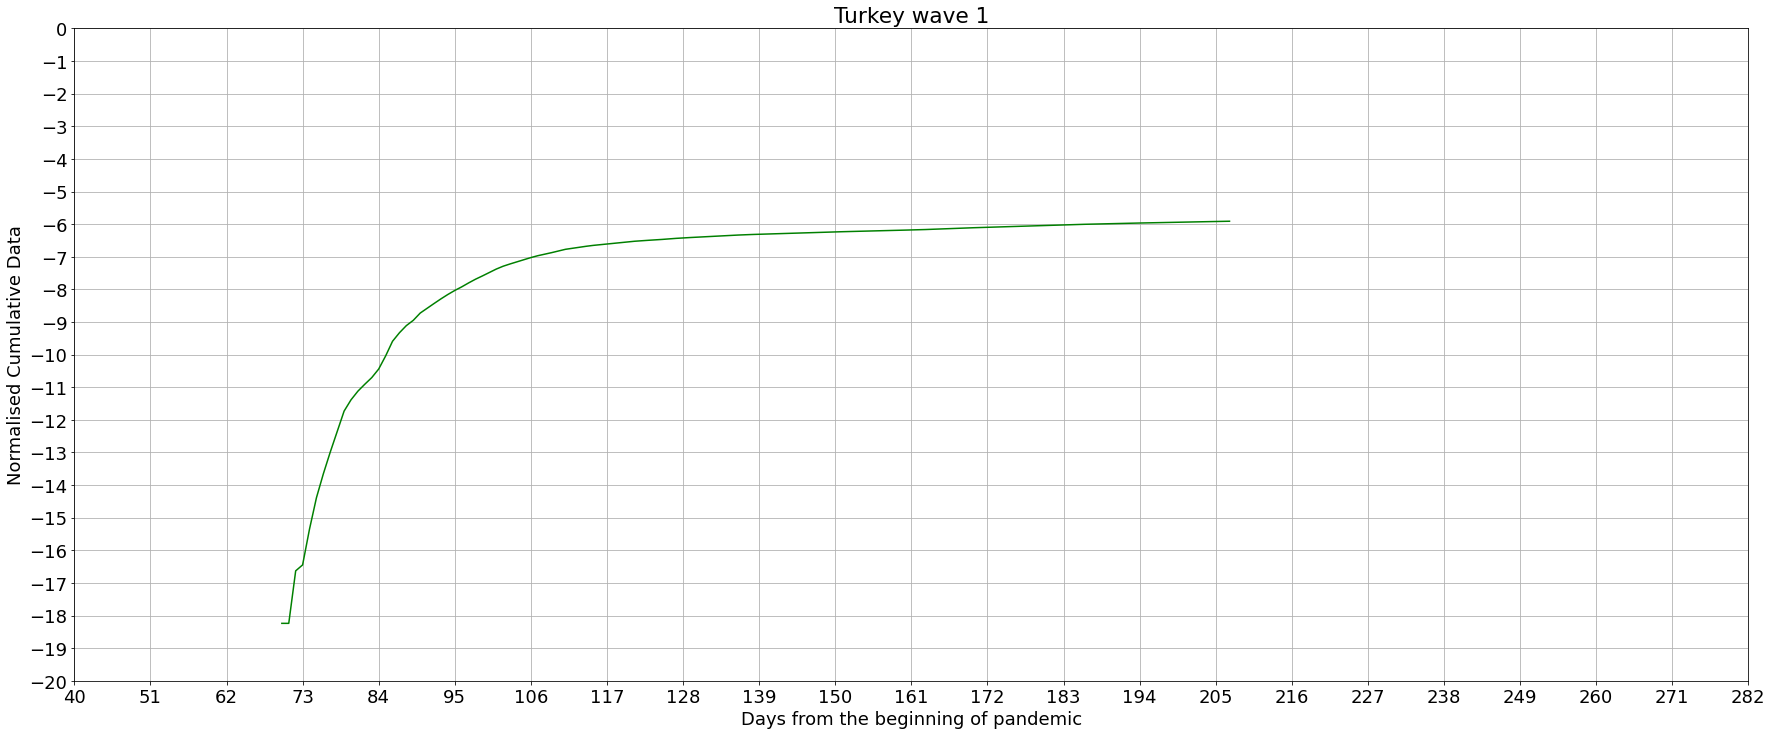

In [45]:
#plot data of the first wave
plt.plot(wave1_x,wave1_log, color="green")

#plt.ylim(-1,20)
#plt.xlim(40,290)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xticks(np.arange(40,290,11))
plt.yticks(np.arange(-20,1,1))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Turkey wave 1')
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

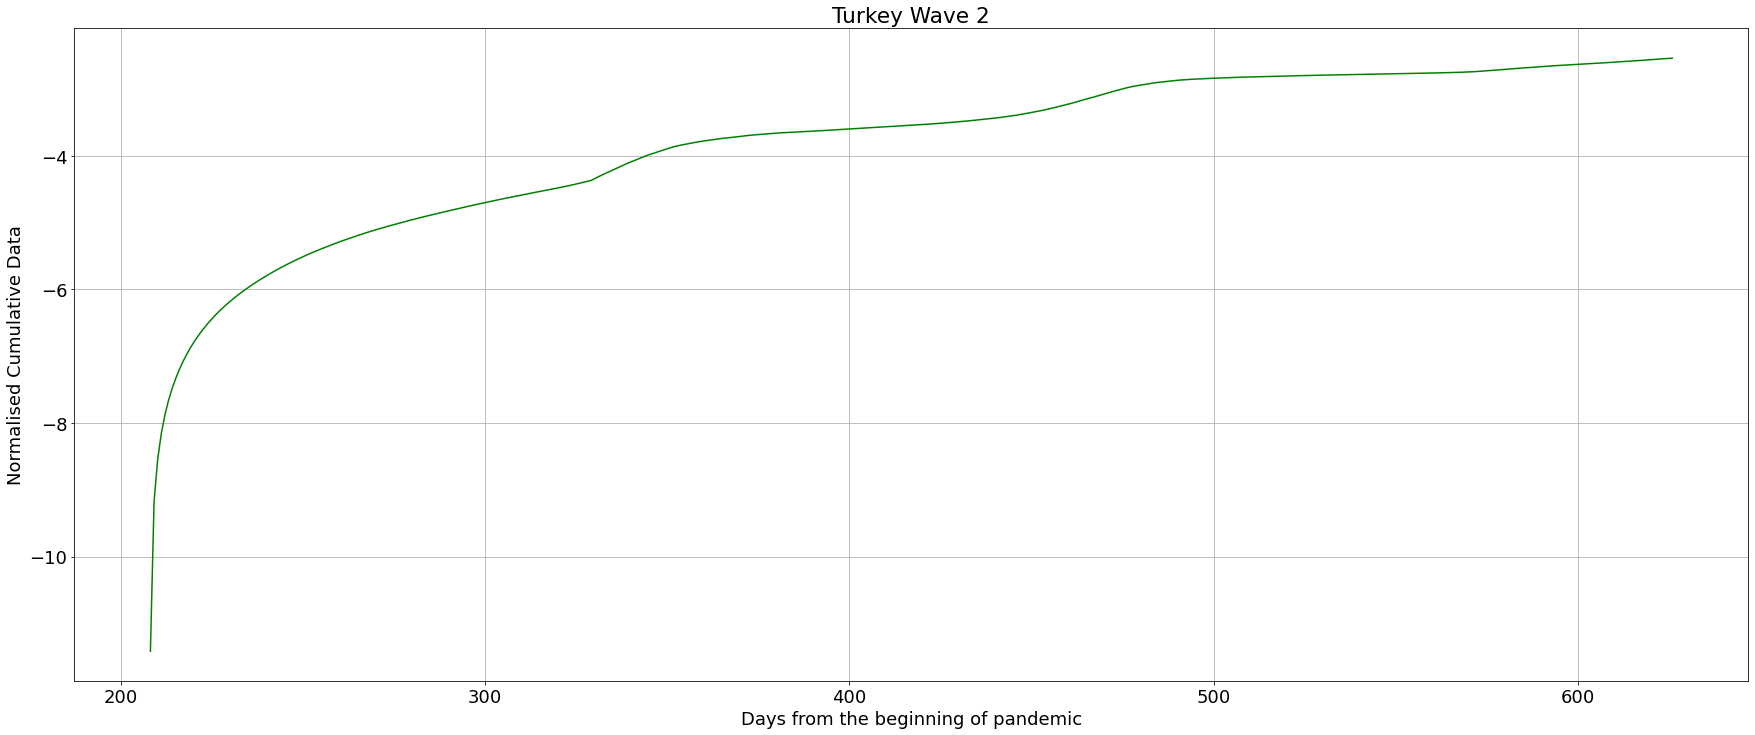

In [46]:
#plot data of the Second wave
plt.plot(wave2_x,wave2_log, color="green")

#plt.ylim(-1,20)
#plt.xlim(40,290)
#ax.yaxis.set_ticks(np.arange(-20,1, 0.001))
#ax.xaxis.set_ticks(np.arange(0,700,25))
#plt.xticks(np.arange(40,290,11))
#plt.yticks(np.arange(-20,1,1))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Turkey Wave 2')
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [47]:
#finding slope (r) and intercept(a) of exponential fragment of first wave
r1,a1 = np.polyfit(wave1_x[0:34],wave1_log[0:34],1)
print(r1)
print(a1)

0.30909601512020407
-37.38870402286964


In [48]:
from scipy.special import expit
#for first fraction of Wave 1
linreg_y= a1+r1*wave1_x[0:34]
obv_y1  =wave1_norm[0:34]
expit(linreg_y)
exp_y = np.exp(linreg_y)
err1_1 = obv_y1 - exp_y
print(obv_y1)

70     1.199904e-08
71     1.199904e-08
72     5.999520e-08
73     7.199424e-08
74     2.159827e-07
75     5.639549e-07
76     1.175906e-06
77     2.291817e-06
78     4.307655e-06
79     8.039357e-06
80     1.136309e-05
81     1.483081e-05
82     1.834653e-05
83     2.246220e-05
84     2.919366e-05
85     4.354452e-05
86     6.837053e-05
87     8.881689e-05
88     1.105952e-04
89     1.299136e-04
90     1.623590e-04
91     1.881329e-04
92     2.176026e-04
93     2.510319e-04
94     2.871850e-04
95     3.248020e-04
96     3.625750e-04
97     4.092753e-04
98     4.586753e-04
99     5.073434e-04
100    5.643029e-04
101    6.259539e-04
102    6.834173e-04
103    7.325294e-04
Name: Cumulative_cases, dtype: float64


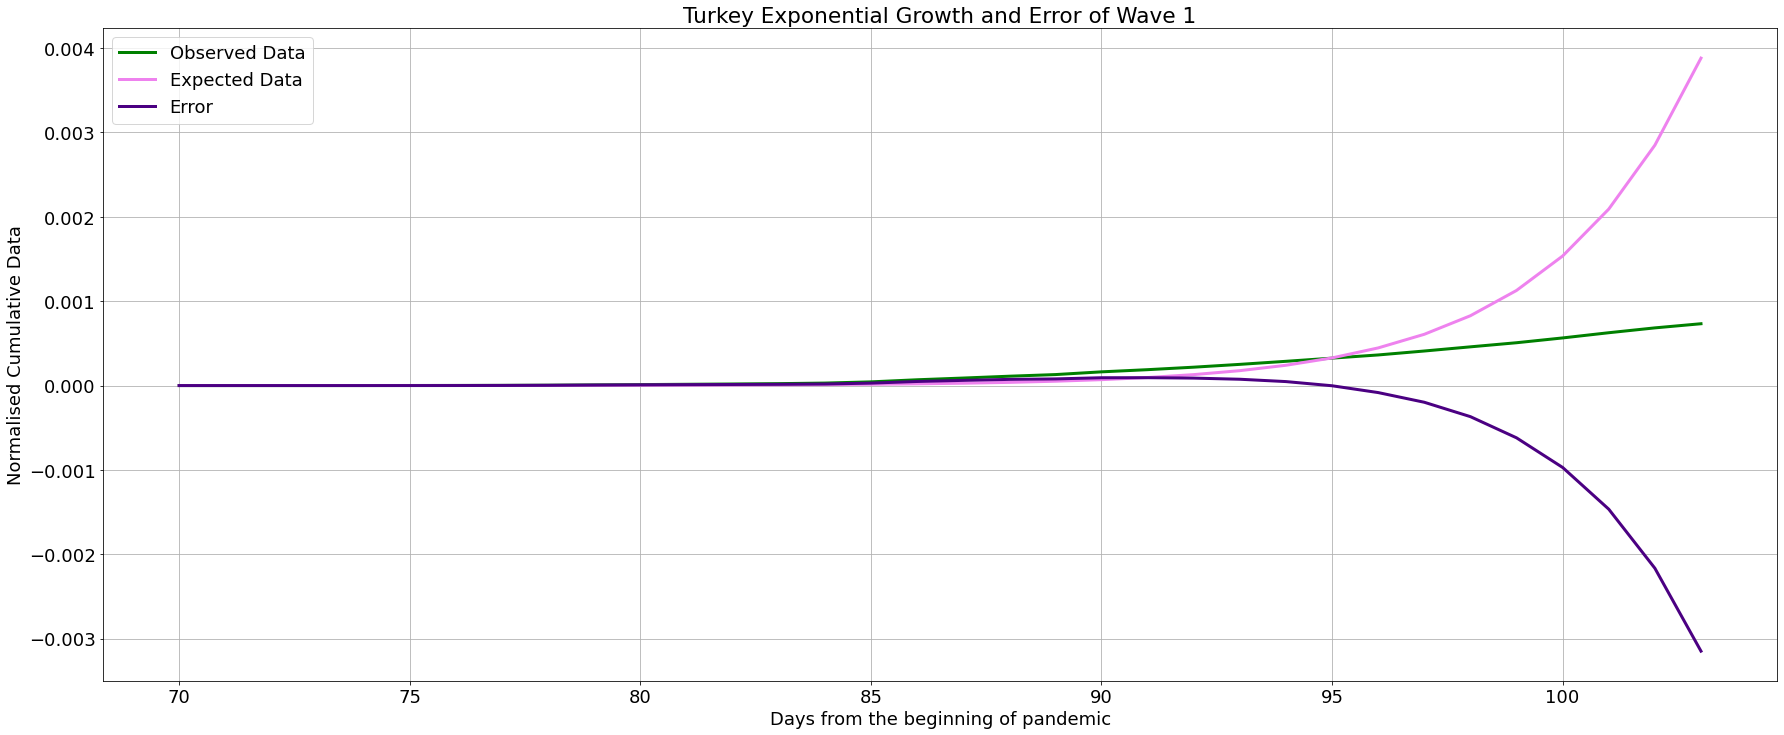

In [49]:
#plot observed vs expected data
plt.plot(wave1_x[:34], obv_y1, color="green",label="Observed Data", linewidth = 3.0)
#linreg_y = a1+r1*wave1_x
plt.plot(wave1_x[:34],exp_y, color="violet",label="Expected Data",linewidth=3.0)
plt.plot(wave1_x[:34],err1_1.values,color="indigo", label ="Error",linewidth=3.0)


plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Turkey Exponential Growth and Error of Wave 1')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [50]:
linreg_y= a1+r1*wave1_x
obv_y1  =wave1_norm

expit(linreg_y)
exp_y = np.exp(linreg_y)
err1_1 = obv_y1 - exp_y
#err1_1.index = range(50,85)

In [51]:
k1_tur_s = obv_y1 * ((1 + exp_y)/exp_y)
k1_tur = k1_tur_s.values
k1_tur[0]

0.08320431451970972

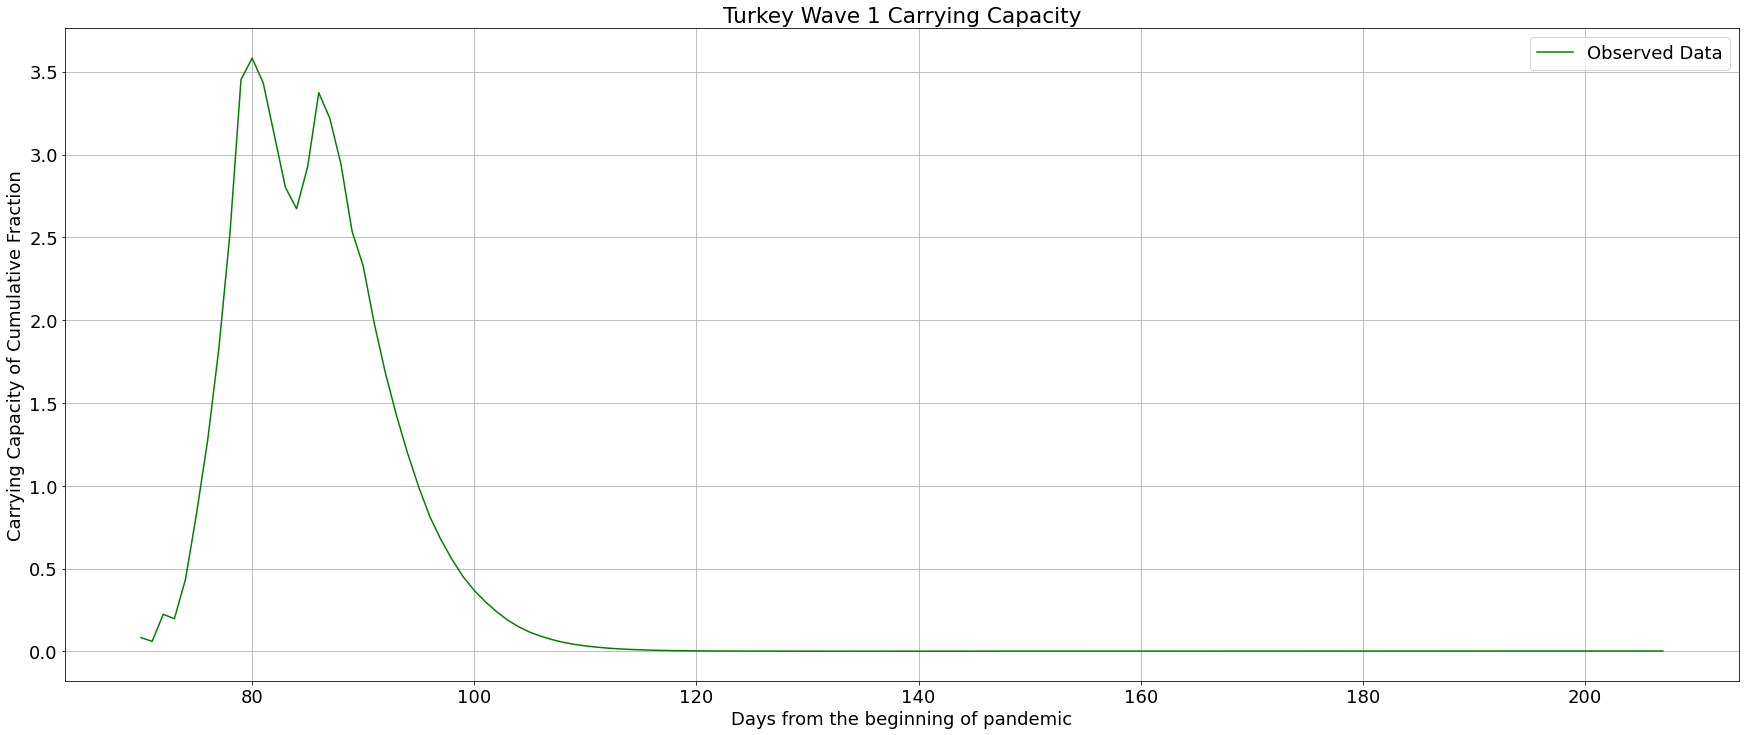

In [52]:
#plot carrying capacity of exponential data
plt.plot(wave1_x,k1_tur, color="green",label="Observed Data")
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Carrying Capacity of Cumulative Fraction')
plt.title('Turkey Wave 1 Carrying Capacity')
plt.legend(loc="upper right")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [53]:
print(k1_tur_s[140], k1_tur_s[160], k1_tur_s[180])

0.0018359903063326966 0.0020652146545651943 0.002383165375079473


In [54]:
k_used = 0.0022
o_len =len(obv_y1)
print(o_len)
nat_log=np.empty(o_len)


138


In [55]:
for i in range(70,207):
    den= np.absolute(k_used-obv_y1[i])
    nat_log[i-69]= np.log(obv_y1[i]/den)

In [56]:
y=wave1_y.values

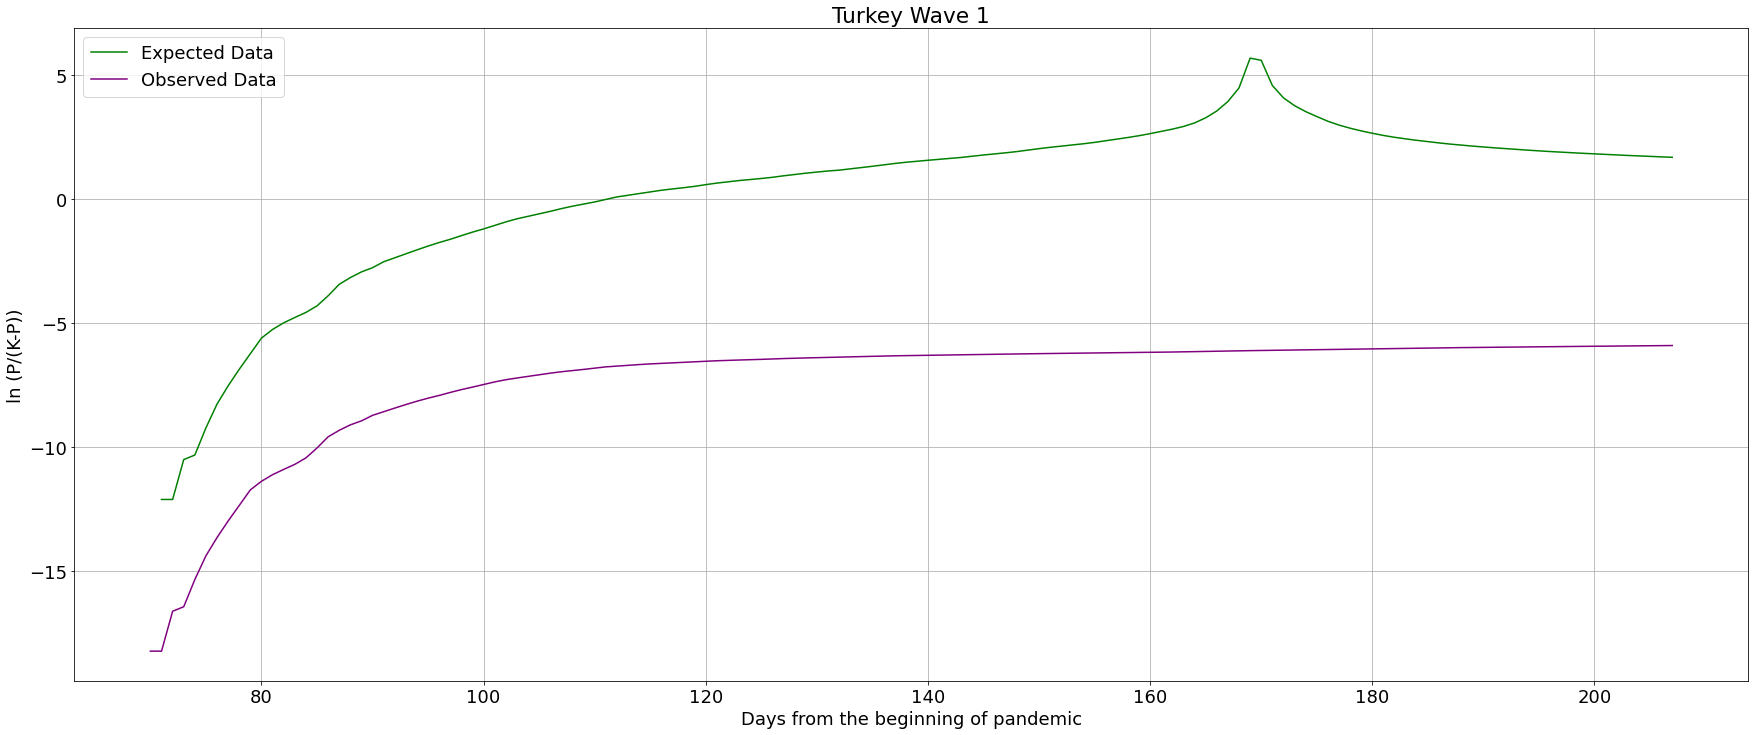

In [57]:
#plot carrying capacity of exponential data
plt.plot(wave1_x, nat_log, color="green",label="Expected Data")
plt.plot(wave1_x, wave1_log,color = "purple", label = "Observed Data")
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('ln (P/(K-P))')
plt.title('Turkey Wave 1')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [58]:
art = a1+ r1*wave1_x
exart = np.exp(art)

In [59]:
Pt1 = (k1_tur *exart)/(1 +exart)
print(Pt1.shape)
print(wave1_x.shape)

(138,)
(138,)


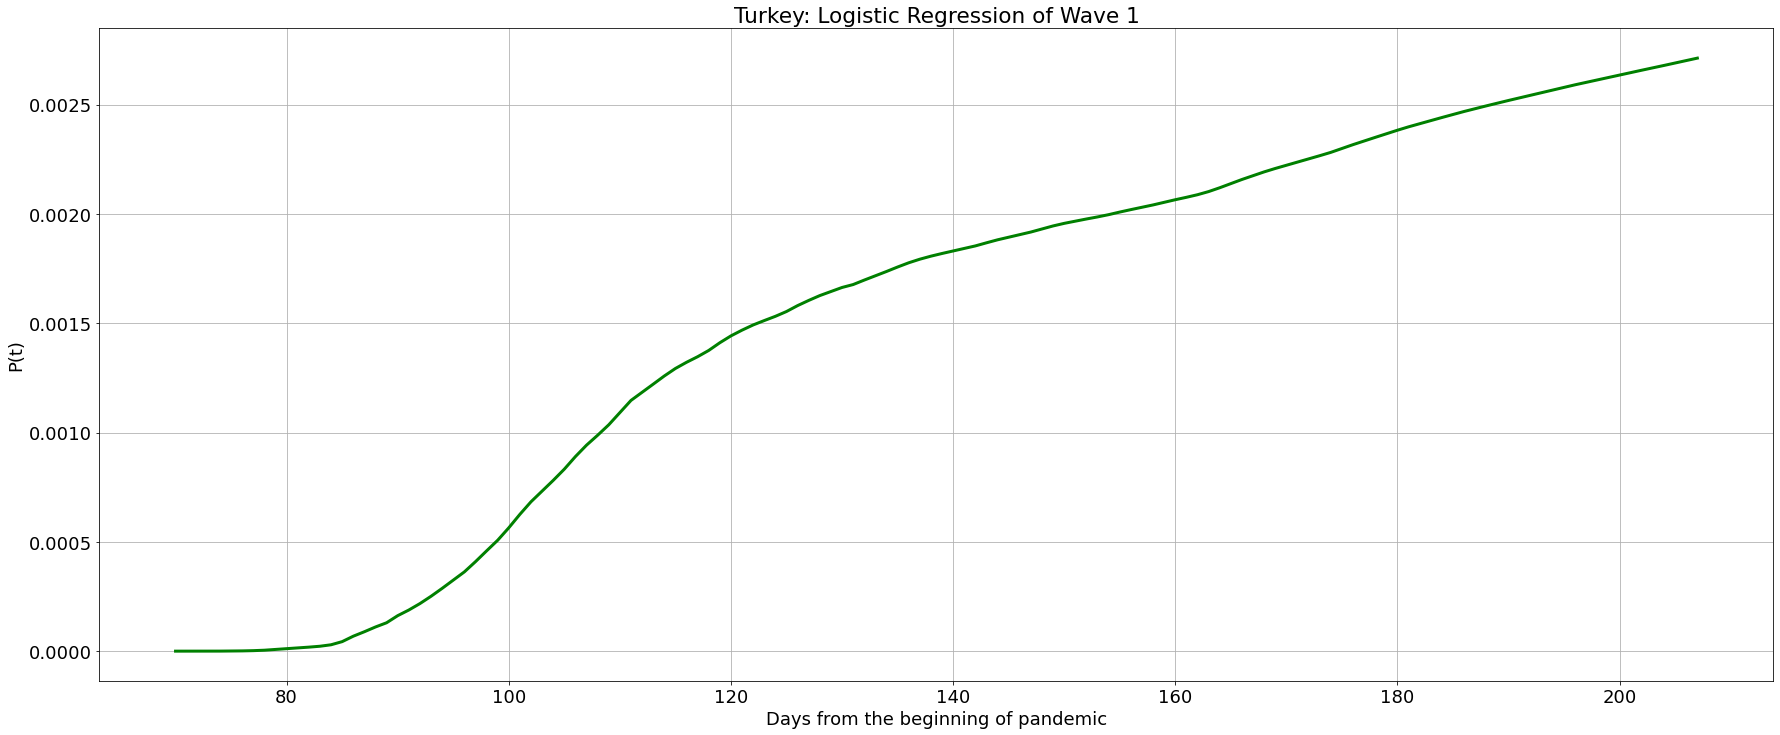

In [60]:
#plot logistic approximation
plt.plot(wave1_x,Pt1, color="green",linewidth=3.0)

plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('P(t)')
plt.title('Turkey: Logistic Regression of Wave 1')
#plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

Wave 2 Turkey

In [78]:
#finding slope (r) and intercept(a) of exponential fragment of second wave
# Wave 2 is split as(208 to 468) and (469 to 626)
r2,a2 = np.polyfit(wave2_x[0:260],wave2_log[0:260],1)
print(r2)
print(a2)

0.014162750860699798
-9.268398584134271


In [79]:
from scipy.special import expit
#for first fraction of Wave 2
linreg_y2= a2+r2*wave2_x[0:260]
obv_y2  =wave2_norm[0:260]
#print(obv_y1)
#print(wave1_norm)
expit(linreg_y2)
exp_y2 = np.exp(linreg_y2)
err1_2 = obv_y2 - exp_y2
err1_2.index = range(208,468)


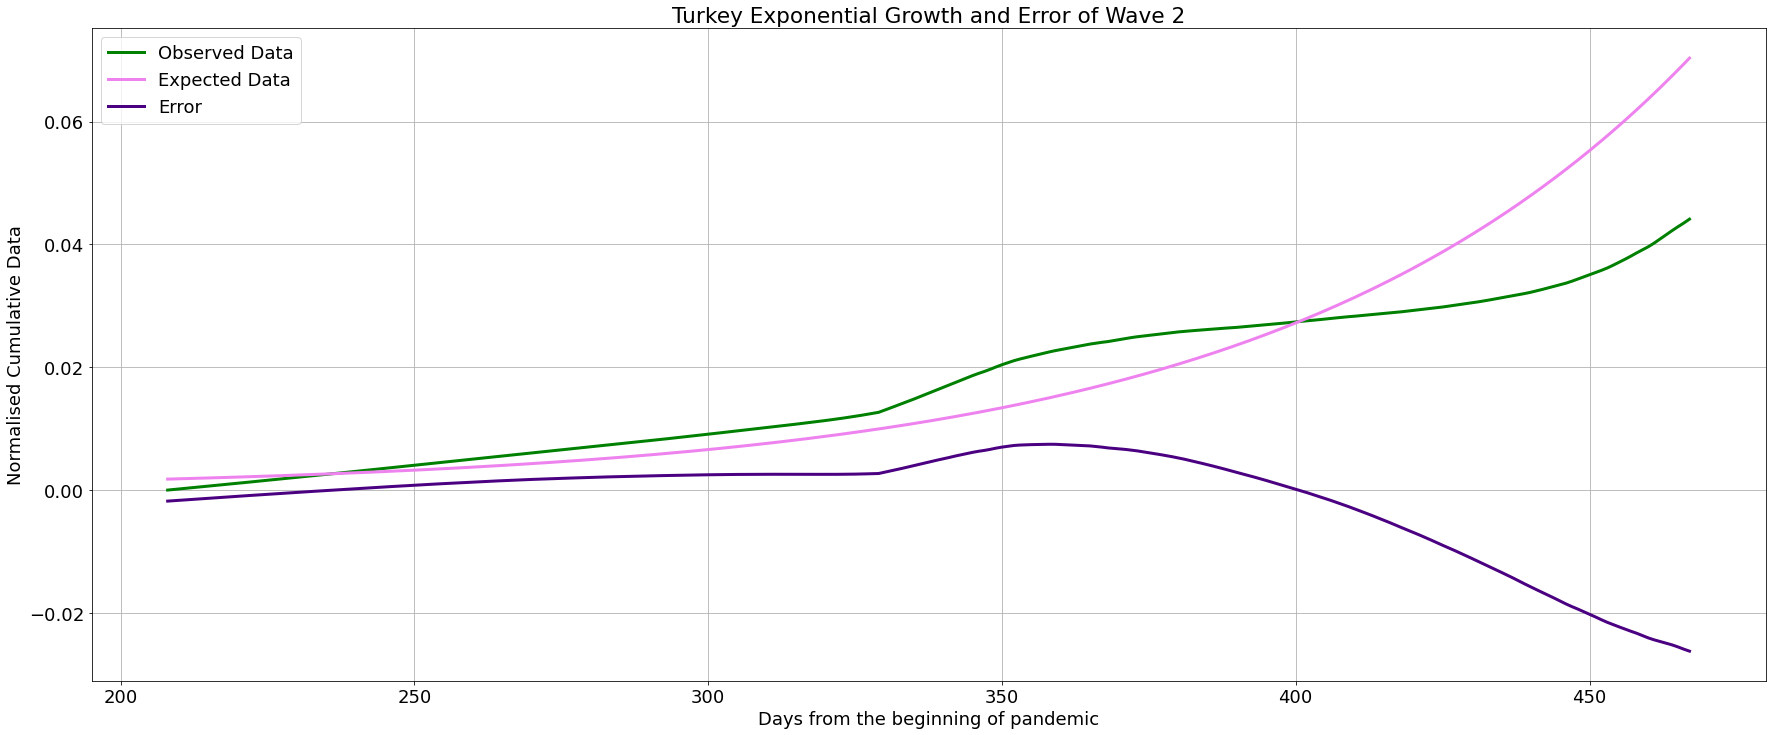

In [80]:
#plot observed vs expected data for Wave 2
plt.plot(wave2_x[:260], obv_y2, color="green",label="Observed Data", linewidth = 3.0)
#linreg_y = a1+r1*wave1_x
plt.plot(wave2_x[:260],exp_y2, color="violet",label="Expected Data",linewidth=3.0)
plt.plot(wave2_x[:260],err1_2.values,color="indigo", label ="Error",linewidth=3.0)

plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.title('Turkey Exponential Growth and Error of Wave 2')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [83]:
linreg_y2= a2+r2*wave2_x
obv_y2  =wave2_norm

expit(linreg_y2)
exp_y2 = np.exp(linreg_y2)
err1_2 = obv_y2 - exp_y2


In [84]:
k2_tur_s = obv_y2 * ((1 + exp_y2)/exp_y2)
k2_tur = k2_tur_s.values
wave2_x

array([208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
       286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
       338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
       364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
       377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 38

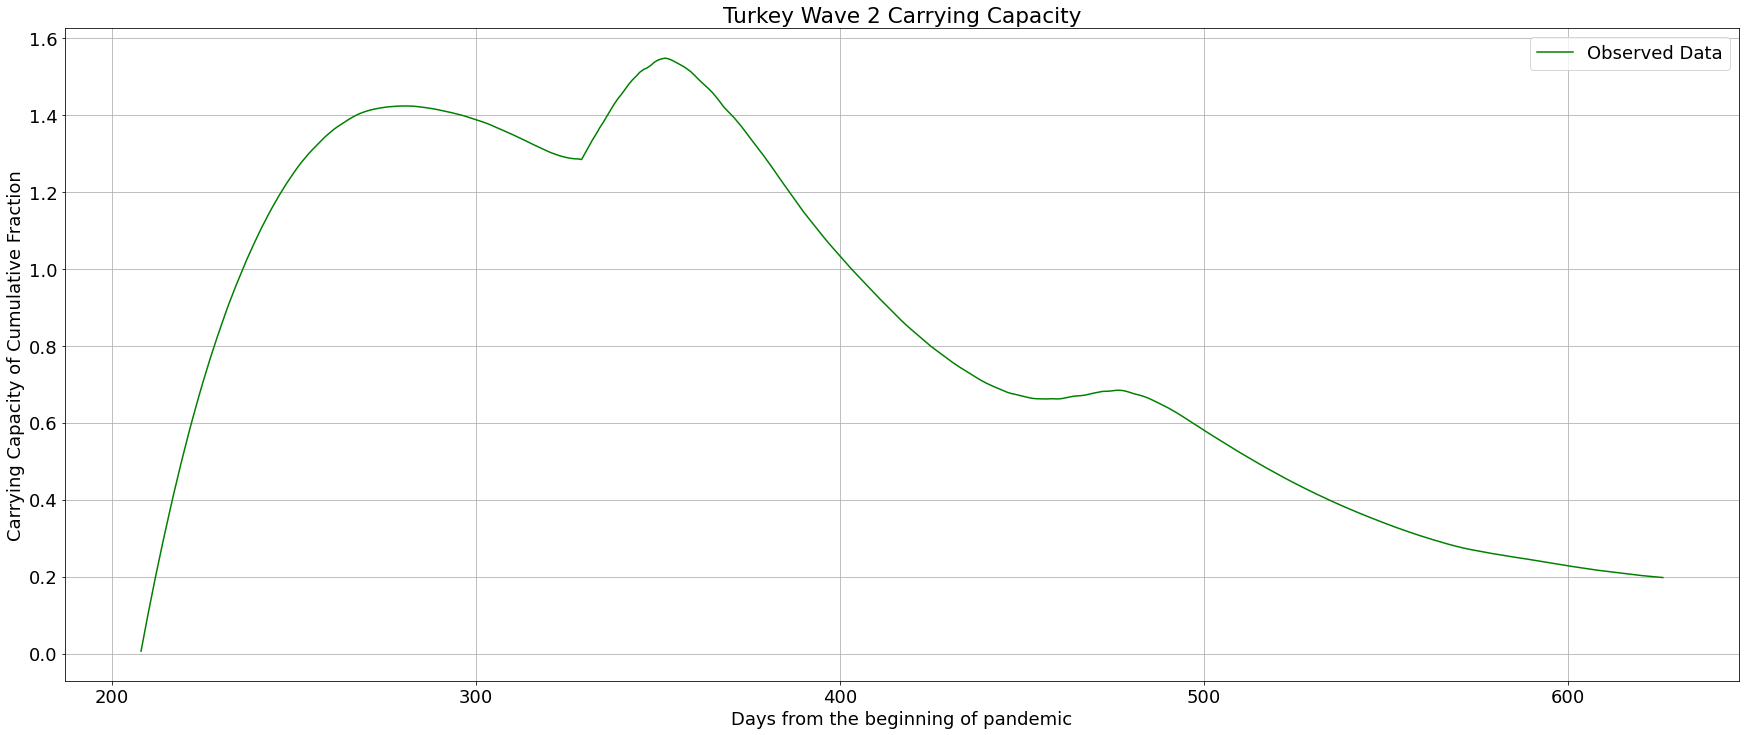

In [85]:
#plot carrying capacity of exponential data
plt.plot(wave2_x,k2_tur, color="green",label="Observed Data")
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Carrying Capacity of Cumulative Fraction')
plt.title('Turkey Wave 2 Carrying Capacity')
plt.legend(loc="upper right")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [86]:
print(k2_tur_s[600])

0.22792073312485633


In [87]:
k_used = 0.33333
o_len =len(obv_y2)
print(o_len)
nat_log=np.empty(o_len)


419


In [88]:
for i in range(208,468):
    den= np.absolute(k_used-obv_y2[i])
    nat_log[i-208]= np.log(obv_y2[i]/den)

In [89]:
y=wave1_y.values

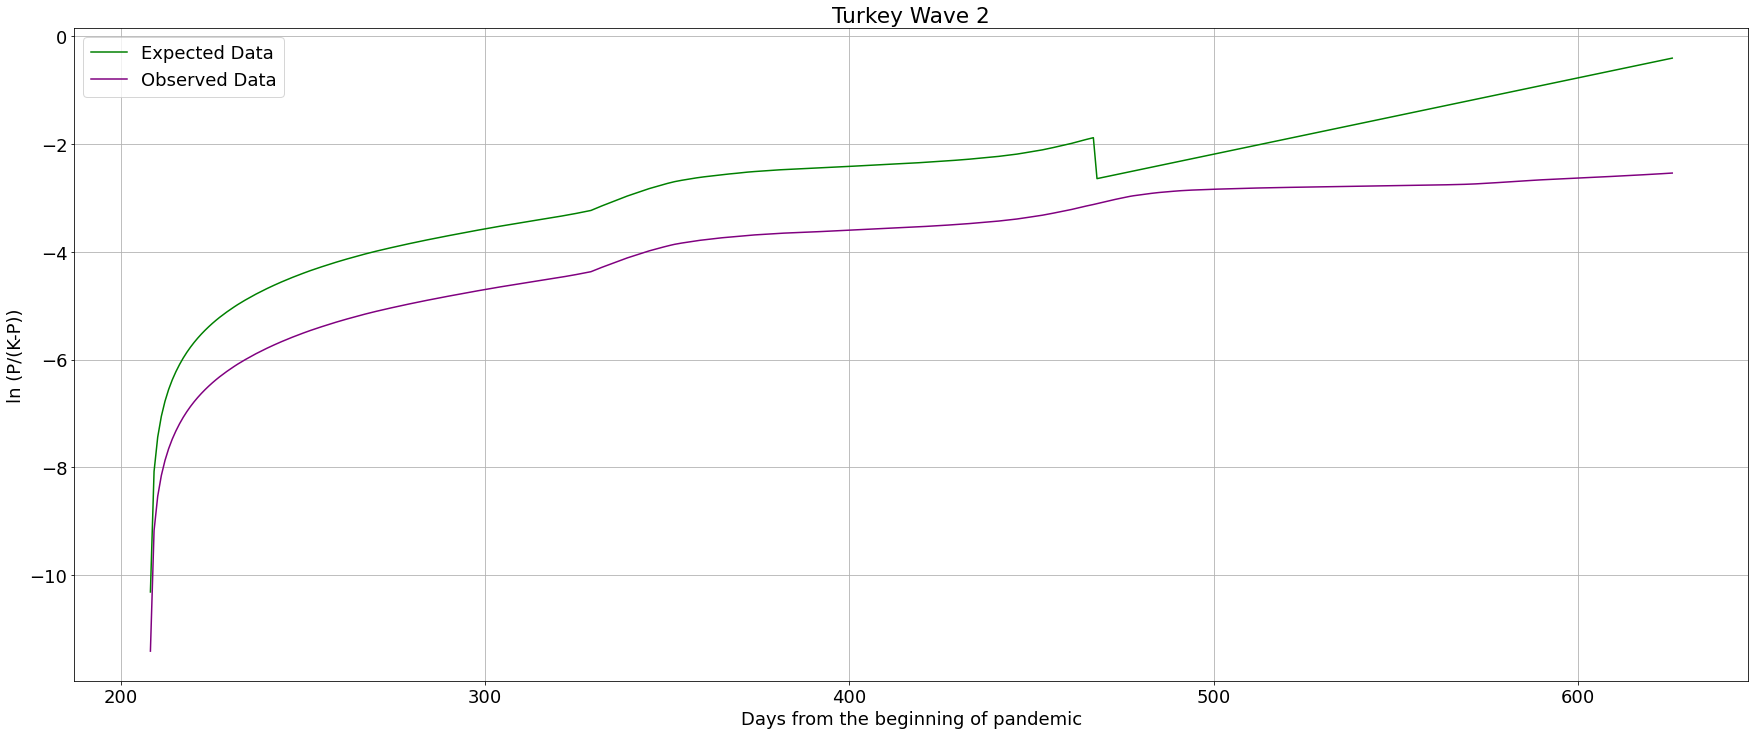

In [90]:
#plot carrying capacity of exponential data
plt.plot(wave2_x, nat_log, color="green",label="Expected Data")
plt.plot(wave2_x, wave2_log,color = "purple", label = "Observed Data")

plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('ln (P/(K-P))')
plt.title('Turkey Wave 2')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [91]:
art = a2+ r2*wave2_x
exart = np.exp(art)

In [92]:
Pt2 = (k2_tur *exart)/(1 +exart)
print(Pt2.shape)
print(wave2_x)


(419,)
[208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405
 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423
 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441
 442 443 444 445 446 447 448 449 450 451 452

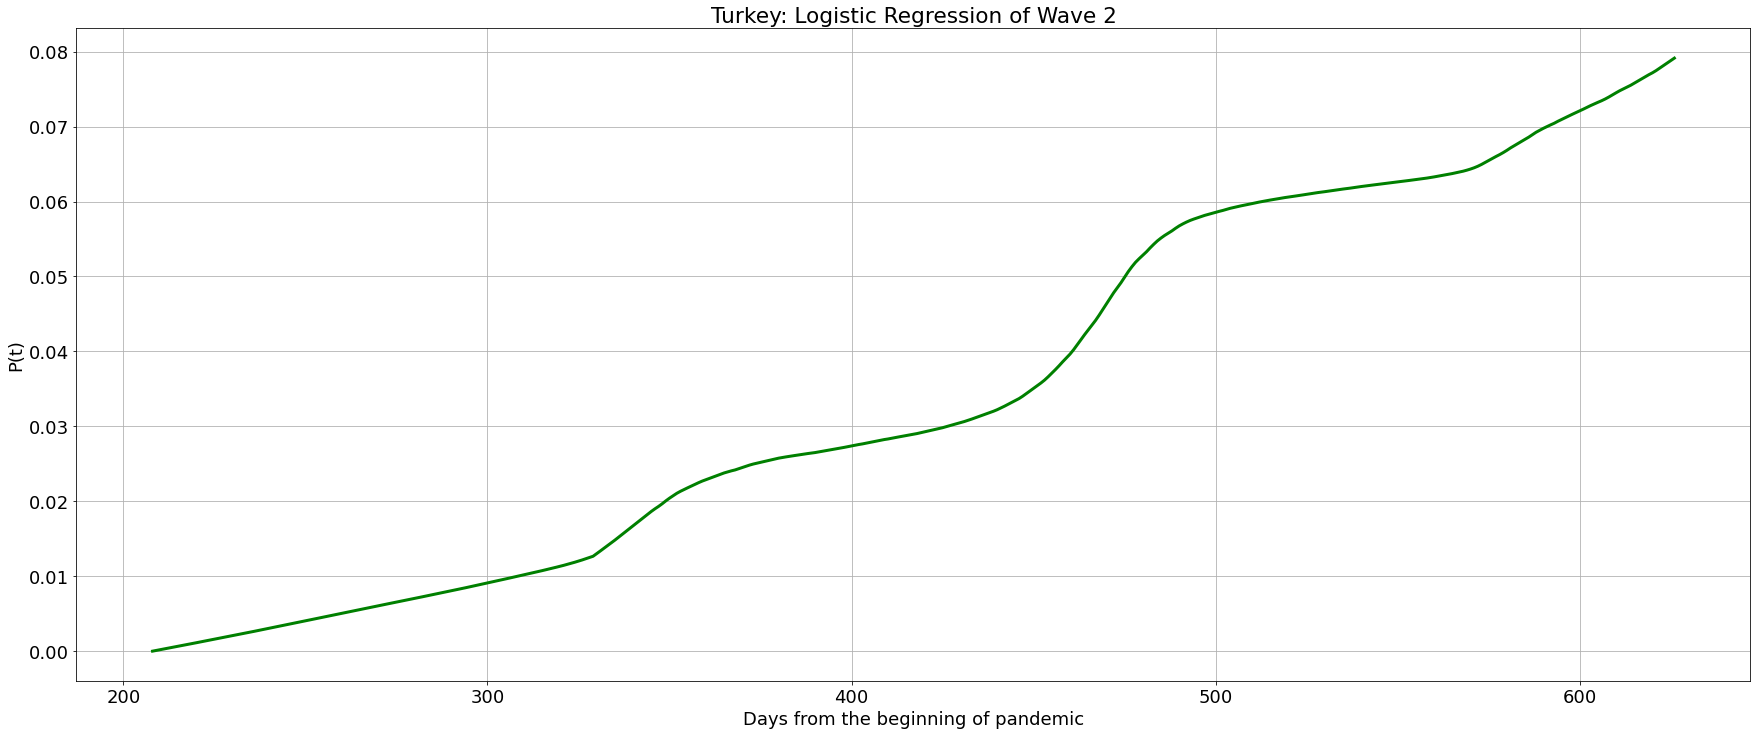

In [93]:
#plot logistic approximation
plt.plot(wave2_x,Pt2, color="green",linewidth=3.0)
#plt.xticks(np.arange(40,300,10))
#plt.yticks(np.arange(-20,2,0.05))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('P(t)')
plt.title('Turkey: Logistic Regression of Wave 2')
#plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

